In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

from src.dataset.preprocessing import preprocess_anime_data

In [2]:
anime = pd.read_csv('../data/external/anime.csv')
anime = preprocess_anime_data(anime)
anime.head(10)

,name,episodes,rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,...,genre_Super_Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,genre_Yuri,type_Movie,type_TV,year,stillAiring
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2016.0,False
5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2009.0,False
28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,2015.0,False
9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2011.0,False
9969,Gintama',51.0,9.16,151266,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,2011.0,False
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,10.0,9.15,93351,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,2016.0,False
11061,Hunter x Hunter (2011),148.0,9.13,425855,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,2011.0,False
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1.0,9.10,72534,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2013.0,False
15417,Gintama': Enchousen,13.0,9.11,81109,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,2012.0,False


In [3]:
anime.columns

Index(['name', 'episodes', 'rating', 'members', 'genre_Action',
       'genre_Adventure', 'genre_Cars', 'genre_Comedy', 'genre_Dementia',
       'genre_Demons', 'genre_Drama', 'genre_Fantasy', 'genre_Game',
       'genre_Historical', 'genre_Horror', 'genre_Josei', 'genre_Kids',
       'genre_Magic', 'genre_Martial_Arts', 'genre_Mecha', 'genre_Military',
       'genre_Music', 'genre_Mystery', 'genre_Parody', 'genre_Police',
       'genre_Psychological', 'genre_Romance', 'genre_Samurai', 'genre_School',
       'genre_Sci-Fi', 'genre_Seinen', 'genre_Shoujo', 'genre_Shoujo_Ai',
       'genre_Shounen', 'genre_Shounen_Ai', 'genre_Slice_of_Life',
       'genre_Space', 'genre_Sports', 'genre_Super_Power',
       'genre_Supernatural', 'genre_Thriller', 'genre_Vampire', 'genre_Yaoi',
       'genre_Yuri', 'type_Movie', 'type_TV', 'year', 'stillAiring'],
      dtype='object')

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 32281 to 33390
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 5698 non-null   object 
 1   episodes             5678 non-null   float64
 2   rating               5698 non-null   float64
 3   members              5698 non-null   int64  
 4   genre_Action         5698 non-null   int64  
 5   genre_Adventure      5698 non-null   int64  
 6   genre_Cars           5698 non-null   int64  
 7   genre_Comedy         5698 non-null   int64  
 8   genre_Dementia       5698 non-null   int64  
 9   genre_Demons         5698 non-null   int64  
 10  genre_Drama          5698 non-null   int64  
 11  genre_Fantasy        5698 non-null   int64  
 12  genre_Game           5698 non-null   int64  
 13  genre_Historical     5698 non-null   int64  
 14  genre_Horror         5698 non-null   int64  
 15  genre_Josei          5698 non-nul

In [5]:
anime.describe(include='all')

,name,episodes,rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,...,genre_Super_Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,genre_Yuri,type_Movie,type_TV,year,stillAiring
count,5698,5678.000000,5698.000000,5.698000e+03,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,...,5698.000000,5698.000000,5698.000000,5698.000000,5698.0,5698.0,5698.000000,5698.000000,5698.000000,5698
unique,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Kimi no Na wa.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5678
mean,NaN,21.007221,6.671358,2.785563e+04,0.273254,0.267813,0.008424,0.398561,0.031415,0.021411,...,0.044577,0.092840,0.010355,0.008424,0.0,0.0,0.399263,0.600737,1998.576869,NaN
std,NaN,41.893043,1.066560,7.285554e+04,0.445669,0.442859,0.091403,0.489645,0.174451,0.144763,...,0.206391,0.290233,0.101238,0.091403,0.0,0.0,0.489790,0.489790,17.945810,NaN
min,NaN,1.000000,2.490000,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1917.000000,NaN
25%,NaN,1.000000,6.130000,2.090000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1990.000000,NaN
50%,NaN,12.000000,6.790000,1.635500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,2005.000000,NaN
75%,NaN,26.000000,7.410000,1.868525e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,2012.000000,NaN


# Type

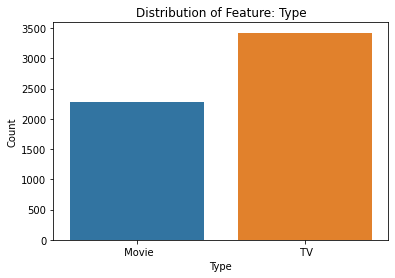

In [6]:
cols = ['type_Movie', 'type_TV']
df = anime[cols]

category_counts = df.sum()
category_counts.rename(index=lambda x: x.replace("type_", " "), inplace=True)

sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Feature: Type')
plt.show()

# Genre

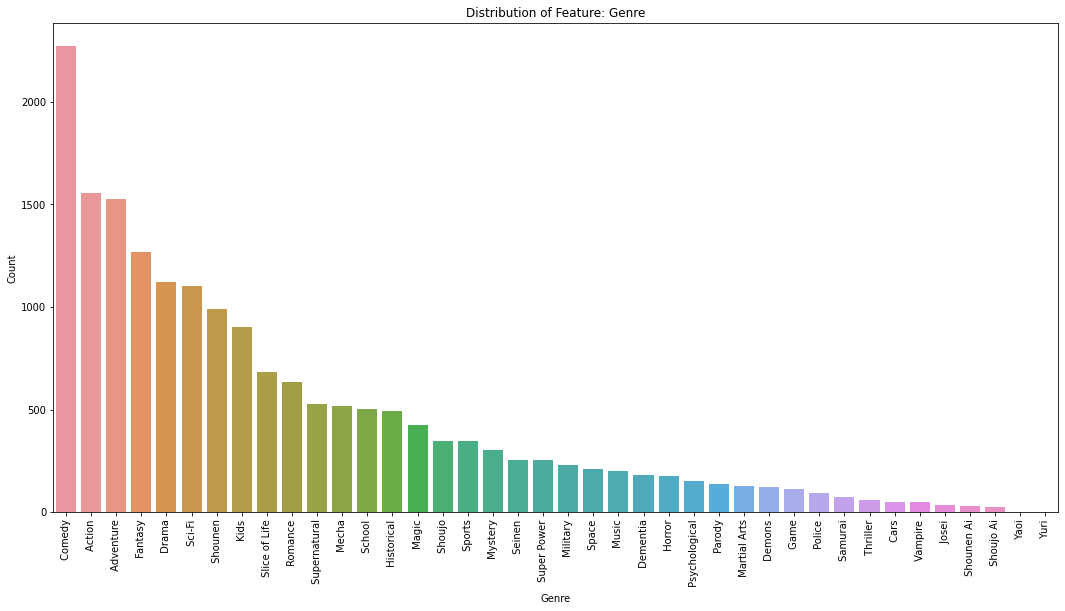

In [7]:
cols = ['genre_Action',
       'genre_Adventure', 'genre_Cars', 'genre_Comedy', 'genre_Dementia',
       'genre_Demons', 'genre_Drama', 'genre_Fantasy', 'genre_Game',
       'genre_Historical', 'genre_Horror', 'genre_Josei', 'genre_Kids',
       'genre_Magic', 'genre_Martial_Arts', 'genre_Mecha', 'genre_Military',
       'genre_Music', 'genre_Mystery', 'genre_Parody', 'genre_Police',
       'genre_Psychological', 'genre_Romance', 'genre_Samurai', 'genre_School',
       'genre_Sci-Fi', 'genre_Seinen', 'genre_Shoujo', 'genre_Shoujo_Ai',
       'genre_Shounen', 'genre_Shounen_Ai', 'genre_Slice_of_Life',
       'genre_Space', 'genre_Sports', 'genre_Super_Power',
       'genre_Supernatural', 'genre_Thriller', 'genre_Vampire', 'genre_Yaoi',
       'genre_Yuri']
df = anime[cols]

category_counts = df.sum()
category_counts.sort_values(ascending=False, inplace=True)
category_counts.rename(index=lambda x: x.replace("genre_", " "), inplace=True)
category_counts.rename(index=lambda x: x.replace("_", " "), inplace=True)

plt.figure(figsize=(18, 9))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Feature: Genre')
plt.xticks(rotation=90)
plt.show()

# Rating (mean rating)

In [8]:
anime.rating.info()

<class 'pandas.core.series.Series'>
Int64Index: 5698 entries, 32281 to 33390
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
5698 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


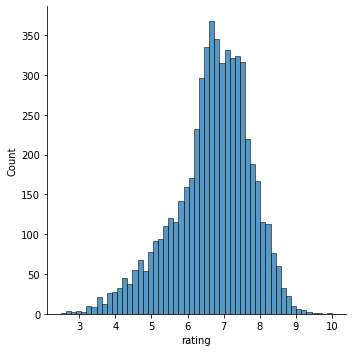

In [9]:
sns.displot(anime.rating)
plt.show()

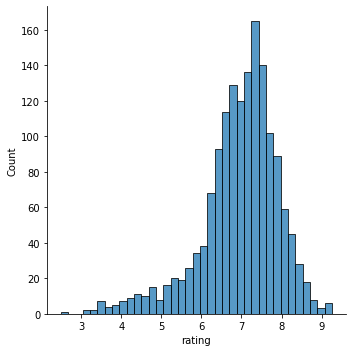

In [10]:
# mainstream genres
sns.displot(anime[anime.genre_Action == 1].rating)
plt.show()

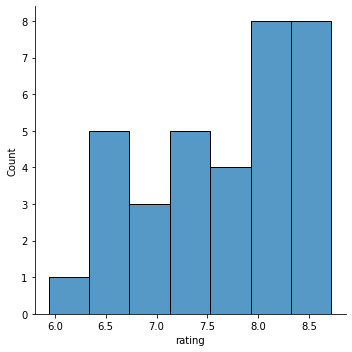

In [11]:
# niche genres
sns.displot(anime[anime.genre_Josei == 1].rating)
plt.show()

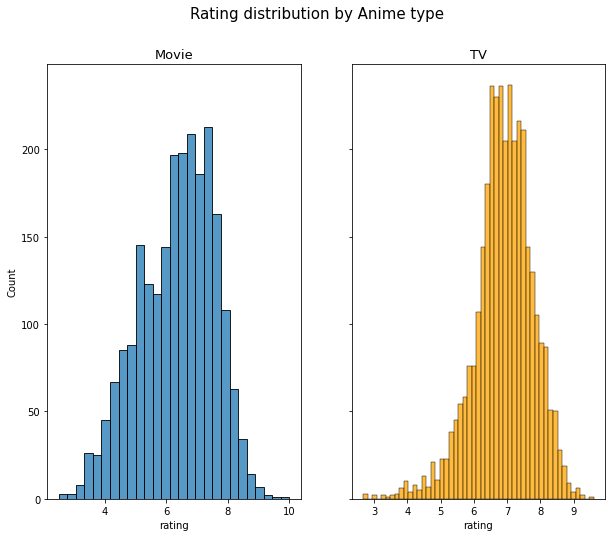

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
fig.suptitle('Rating distribution by Anime type', fontsize=15)

axes[0].set_title('Movie', fontsize=13)
sns.histplot(anime[anime.type_Movie == 1].rating, ax=axes[0])

axes[1].set_title('TV', fontsize=13)
sns.histplot(anime[anime.type_TV == 1].rating, ax=axes[1], color='orange')

plt.show()

# Year

In [13]:
anime.year.info()

<class 'pandas.core.series.Series'>
Int64Index: 5698 entries, 32281 to 33390
Series name: year
Non-Null Count  Dtype  
--------------  -----  
5698 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


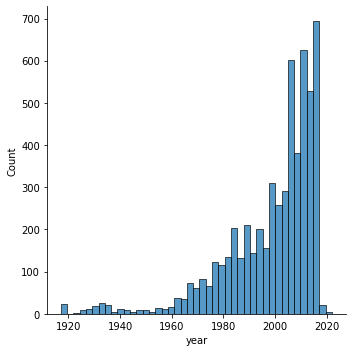

In [14]:
sns.displot(anime.year)
plt.show()

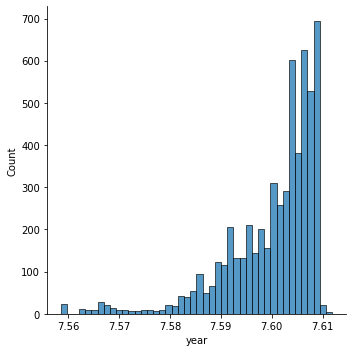

In [15]:
sns.displot(np.log(anime.year))

# Members

In [16]:
anime.members.info()

<class 'pandas.core.series.Series'>
Int64Index: 5698 entries, 32281 to 33390
Series name: members
Non-Null Count  Dtype
--------------  -----
5698 non-null   int64
dtypes: int64(1)
memory usage: 89.0 KB


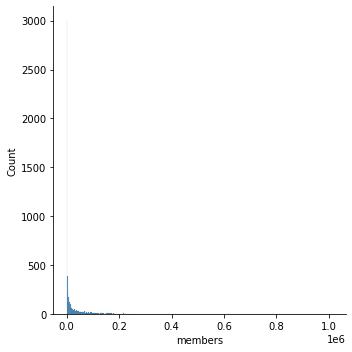

In [17]:
sns.displot(anime.members)
plt.show()

In [18]:
quantiles = anime.members.quantile([0.25, 0.5, 0.75])
quantiles

0.25      209.00
0.50     1635.50
0.75    18685.25
Name: members, dtype: float64

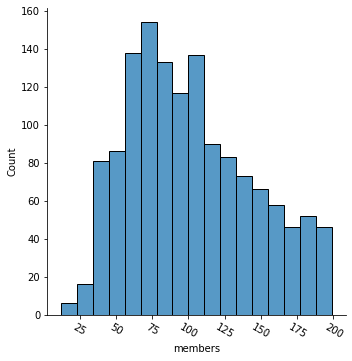

In [19]:
sns.displot(anime[anime.members < 200].members)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

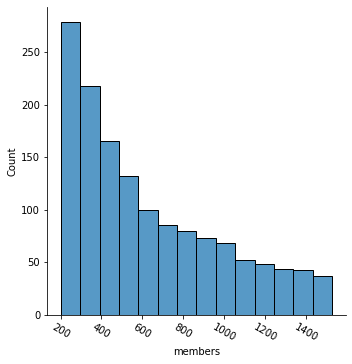

In [20]:
sns.displot(anime[(anime.members > 200) & (anime.members < 1534)].members)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

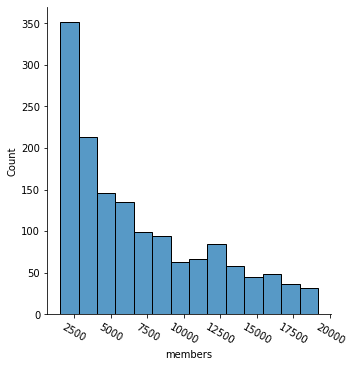

In [21]:
sns.displot(anime[(anime.members > 1534) & (anime.members < 19209)].members)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

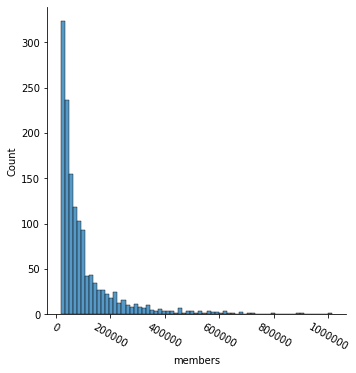

In [22]:
sns.displot(anime[anime.members > 19209].members)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

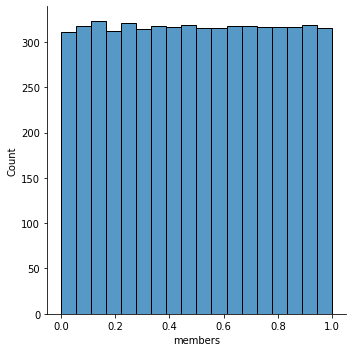

In [23]:
members_transformed = pd.Series(QuantileTransformer(output_distribution='uniform').fit_transform(np.array(anime.members).reshape(-1, 1)).flatten(), name='members')
sns.displot(members_transformed)
plt.show()

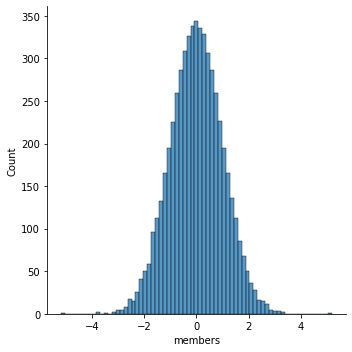

In [24]:
members_transformed = pd.Series(QuantileTransformer(output_distribution='normal').fit_transform(np.array(anime.members).reshape(-1, 1)).flatten(), name='members')
sns.displot(members_transformed)
plt.show()

# Episodes

In [25]:
anime.episodes.info()

<class 'pandas.core.series.Series'>
Int64Index: 5698 entries, 32281 to 33390
Series name: episodes
Non-Null Count  Dtype  
--------------  -----  
5678 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


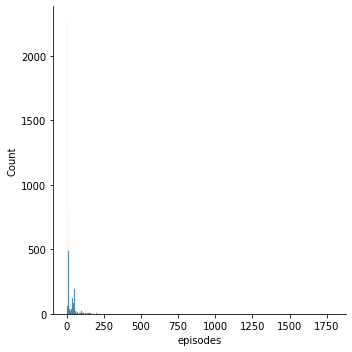

In [26]:
sns.displot(anime.episodes)
plt.show()

In [27]:
quantiles = anime.episodes.quantile([0.25, 0.5, 0.75])
quantiles

0.25     1.0
0.50    12.0
0.75    26.0
Name: episodes, dtype: float64

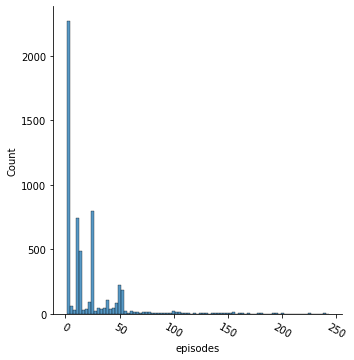

In [38]:
sns.displot(anime[anime.episodes <= 250].episodes)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

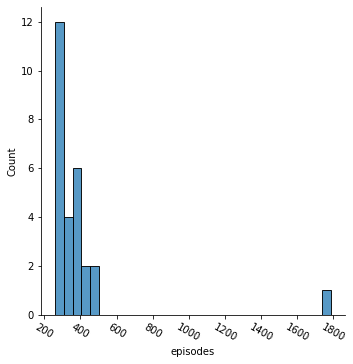

In [39]:
sns.displot(anime[anime.episodes > 250].episodes)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=-30)
plt.show()

# Year vs. Rating

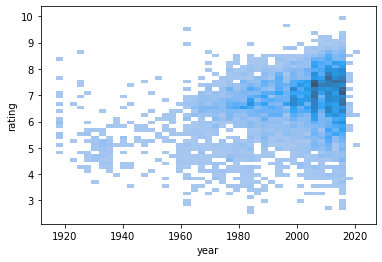

In [30]:
sns.histplot(anime, x = 'year', y = 'rating')
plt.show()

In [31]:
regr = LinearRegression()
df = anime.dropna()
X = np.array(df.year).reshape(-1, 1)
y = np.array(df.rating)
regr.fit(X, y)
regr.score(X, y)

0.09815779032832483

# Members vs. Rating

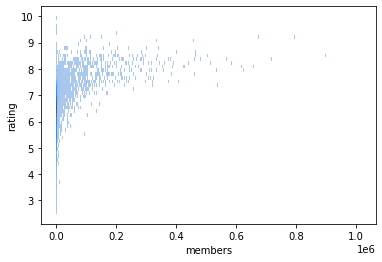

In [32]:
sns.histplot(anime, x = 'members', y = 'rating')
plt.show()

In [33]:
regr = LinearRegression()

X = np.array(anime.members).reshape(-1, 1)
y = np.array(anime.rating)

regr.fit(X, y)
regr.score(X, y)

0.1756134015191032

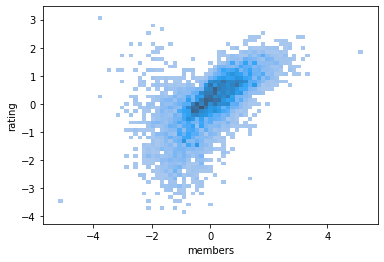

In [34]:
rating_transformed = pd.Series(StandardScaler().fit_transform(np.array(anime.rating).reshape(-1, 1)).flatten(), name='rating')
members_transformed = pd.Series(QuantileTransformer(output_distribution='normal').fit_transform(np.array(anime.members).reshape(-1, 1)).flatten(), name='members')

sns.histplot(x = members_transformed, y = rating_transformed)
plt.show()

In [35]:
regr = LinearRegression()

X = np.array(members_transformed).reshape(-1, 1)
y = np.array(rating_transformed)

regr.fit(X, y)
regr.score(X, y)

0.4184689191127582

# Pairplot

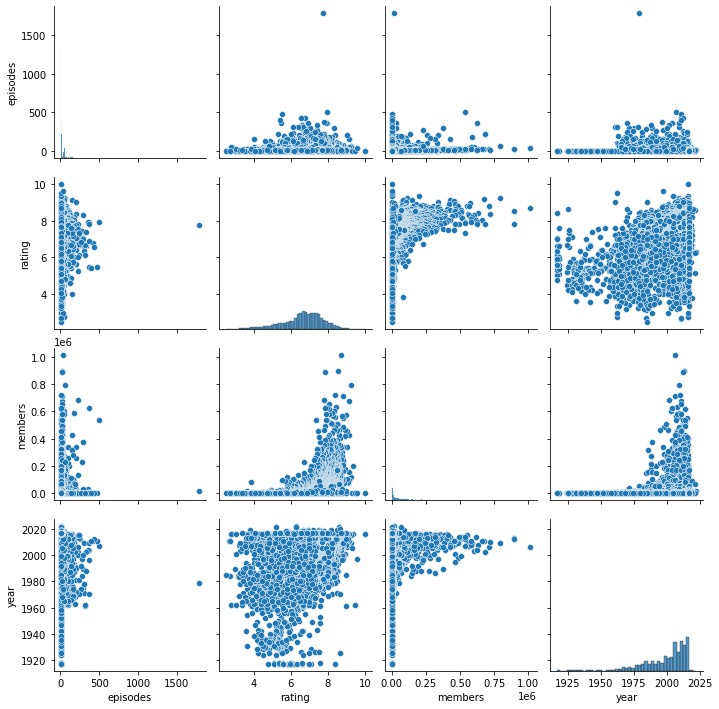

In [36]:
cols = ['episodes', 'rating', 'members', 'year']
df = anime[cols]

sns.pairplot(df)
plt.show()

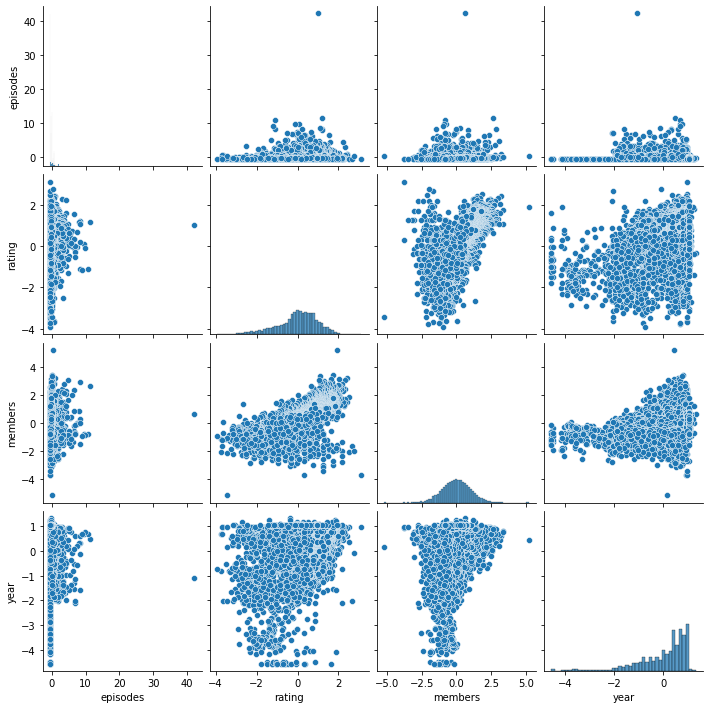

In [42]:
cols = ['episodes', 'rating', 'members', 'year']
df = anime[cols].copy()

df.loc[:, 'episodes'] = StandardScaler().fit_transform(np.array(anime.episodes).reshape(-1, 1))
df.loc[:, 'rating'] = StandardScaler().fit_transform(np.array(anime.rating).reshape(-1, 1))
df.loc[:, 'members'] = QuantileTransformer(output_distribution='normal').fit_transform(np.array(anime.members).reshape(-1, 1))
df.loc[:, 'year'] = StandardScaler().fit_transform(np.array(anime.year).reshape(-1, 1))

sns.pairplot(df)
plt.show()